# 0. Introduction

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>
    
Recent advancements in slide scanning technology have made it easier to conduct microscopic evaluations of **histopathologically** stained tissues and to digitize the results. As a result, digital analysis using deep learning has emerged as a promising tool for diagnosis. 

Evaluating the extent of cancer spread through the histopathological analysis of **sentinel axillary lymph nodes (SLNs)** is a vital part of the breast cancer staging process.

This document discusses strategies to mitigate **overfitting** in models and explores practical techniques for **optimal modeling**. It emphasizes the importance of balancing model complexity with generalization to achieve the best performance on unseen data.

## - Dataset Used

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>
    
This dataset contains **several small pathology images** (histopathology images) that need classification. Each file is named with a unique image ID. The `train_labels.csv` file provides the ground truth labels for the images in the training folder. I will be predicting the labels for the images located in the `test` folder.

A positive label indicates that the **central 32x32 pixel** area of a patch contains at least one pixel of tumor tissue. Note that tumor tissue in the outer region of the patch does not affect the label. The inclusion of this outer region aims to support fully convolutional models that do not use zero-padding, ensuring consistent behavior when applied to whole-slide images.

For **access to the data**, please use the following link:
https://www.kaggle.com/c/histopathologic-cancer-detection/data

## - Which Structures?

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>
    
In this project; First, I will utilize three types of Convolutional Neural Network (CNN) models: **AlexNet**, **VGGNet**, and **ResNet**. These models are some of the most popular CNN architectures used for image analysis tasks. Each CNN structure has unique attributes and advantages, and we will evaluate which models are best suited for our images by comparing their results.

Additionally, I will use the **EfficientNet** models, which are popular for their various versions ranging from B0 to B7. Depending on factors such as the number of inputs, image sizes, model layers, and computational power, one can select the simplest model, EfficientNetB0, or move up to the more complex EfficientNetB7. Given the small image size in this dataset, I prefer to use **EfficientNetB0**, **EfficientNetB1**, and **EfficientNetB2**. Ultimately, I will compare their results to determine the best version for **histopathology images**!

It’s important to note that the actual size of the images is **96x96 pixels**; however, to avoid overfitting, you could resize the **input images to 128x128 pixels** but this will cause an increase in training time and likely **time-out error** in kaggle run.

> ### ***NOTE*:**
>
> I adjusted the code to run on images, yielding the best results with **modifying each version**. First, I addressed the **overfitting** issue. Because accuracy decreased when overfitting occurred, I then focused on **optimizing accuracy**. In the end, to resolve the **time-out problem**, I employed the **GPU T4X2**, which reduces training time through parallel processing on two GPUs.
> 
> Finally, in **the last two versions**, to address the time-out error in Kaggle runs and reduce training time, I used GPU T4X2 and adjusted the total number of epochs from twenty to **two runs of ten epochs each**. Additionally, I applied functions to improve code readability.

> *I will explain these modifications in the introduction following sections. Moreover, I have provided detailed explanations throughout the code to enhance clarity.*


> ### ***Please:***
>
>   *Feel free to **share your thoughts in the *discussion*** section—let’s challenge this run together!*

## - First Modification: Overcoming "Overfitting" in Models

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>
In the first versions, the model tended to overfit due to its general hypotheses. To address this issue, I implemented the following solutions:

- Applied **Dropout** to the model and increased the dropout rate from 0.5 to 0.6.
- Added **L2 Regularization** to both the Conv2D and Dense layers.
- Reduced the **learning rate** to 0.0001 (while I could use a non-constant rate, it would incur a higher computational cost).
- Utilized **data augmentation** (rotation, shift, zoom, horizontal flip) to diversify the images.
- **Frozen the initial layers** of the EfficientNet architecture.

## - Second Modification: Optimizing Models to "Enhance Accuracy"

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>
    
**After addressing overfitting**, the learning of the training dataset decreases slightly due to data augmentation and nearest result learning to actual outcomes. I implemented these changes in the next versions to **enhance accuracy**:
- Enable **Early Stopping** and **increase the number of epochs**. **Early Stopping** will halt training when there is no improvement in performance, helping to prevent overfitting and reducing overall training time.

- Enable **ReduceLROnPlateau** to optimize the learning rate. This technique dynamically **lowers the learning rate**, providing the model with more opportunities for effective learning. I started with a **learning rate of 0.001**, then modified it from the previous rate of 0.0001.

- The **Dropout** value has been reduced to **0.5** for the first three models and to **0.4** for the EfficientNet models, as the EfficientNet architecture typically requires less Dropout.

- The **L2 regularization** value has been **lowered to 0.0001** to maintain weight stability.

- The intensity of **data augmentation** has been balanced with the following settings: **Rotation set** to 15 degrees, **Shifts** set to 0.1, and **Zoom** set to 0.1.

## - Third Modification: GPU Used; GPU T4X2 

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>

Running the code in Kaggle is likely to result in a **timeout error**, as it may take more than 12 hours to complete. To address this issue, I chose to use the **`GPU T4x2`** setup, utilizing **two GPUs**. It's important to remember that we need to implement a **MirroredStrategy** for compiling the models. 

To effectively distribute the data, **strategy.experimental_distribute_dataset()** was utilized. This enables a more efficient **distribution of data across GPUs**.

These solutions significantly **shorten the training duration** and solve the likely **timeout error**. 

>
>***Size of input images** and **BatchSize** :*
>
>The input images are considered to have an **actual size of 96x96 pixels**. I will test the **BatchSize values of 16, 32, and 64**.

## - Fourth Modification: Split the Training into Two Runs

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>
    
The main challenge remains **reducing training time** to fit within Kaggle's execution limits. Using two GPUs alone was not enough to solve this issue.

*I suggest the following approach:*
- Use `ModelCheckpoint` to **automatically save** the best model at each epoch.
- Split the training process into **two runs**, ensuring results are saved in **history** and reloaded when available using custom save and load functions.
 
*Two Strategies Considered:*
1. **Splitting the models:** Since we are training six models, the first run will train AlexNet, VGGNet, and ResNet, while the second run will train EfficientNetB0, EfficientNetB1, and EfficientNetB2.
2. **Splitting the epochs (Recommended):** Train all models for 10 epochs in the first run, then continue from epoch 10 to 20 in the second run.
   

> ***Note:***
> 
> These modifications are implemented in the last two versions. **Let me know your thoughts in the discussion section!**

## - Final Adjustments

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>

*After adjusting the settings to reduce training time and optimize results, the final configurations are as follows:*

- **Batch Size: 64** (for two T4 GPUs) [Batch size of 64 produced the best results.]
- Disabling **Mixed Precision**. It caused **NaN** in the loss function.
- Implement `ReduceLROnPlateau` with a **factor of 0.5**, a **patience of 2**, and a **minimum learning rate of 1e-5**.
- Use `Early Stopping` with a **patience of 3**.
- Set the initial **Learning Rate to 0.001**.
- Set **Dropout between 0.4 and 0.6**.

### - Always keep the following points:

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>

- The number of images in all three datasets- `training`, `validation`, and `testing`- must be **divisible by the batch size**. Otherwise, the last incomplete batch may be divided among GPUs, resulting in errors.
- It is advisable to **specify `steps`** when evaluating or predicting on the dataset. This is important because when we use `tf.data.Dataset`, TensorFlow may not know when to stop, especially if repeat() is used, or if the dataset is endless.
- Ensure the **existence of the model** before `loading` it, as verifying file existence helps maintain control and stability during the load, evaluation, and prediction steps.
- Utilize **`drop_remainder=True`** in `tf.data.Dataset.from_generator` when employing **MultiGPU** (MirroredStrategy) to drop the incomplete batch. Otherwise, the second GPU may not receive data in the last batch.
- Using `prefetch` and **AUTOTUNE** can enhance the model's speed, particularly in the parallel loading of data. This is crucial because GPUs should not wait for samples to be fed into the data pipeline, ultimately increasing the overall speed of training and prediction.
- A common and significant issue with **MirroredStrategy** is the uneven distribution of data across two GPUs, particularly when running different models (for instance, six models were used for comparison in this case). To address this problem, follow these steps:

1. Call `K.clear_session()`, `gc.collect()`, and `reset_default_graph()` before defining the strategy.
2. The `train_model()` function is invoked multiple times during the code execution, but the previous model remains loaded on the GPU. To resolve this, *define MirroredStrategy only once*, outside the `train_model` function, and use it within the function.

## **Top 10 Benefits of This Notebook:**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>

1. Proper data partitioning for **batch sizes** (`Batch Size = 64`) across `training`, `validation`, and `test` datasets.
2. Conversion of data into **DataFrame** format and transformation of *labels* into **strings** to ensure compatibility with `flow_from_dataframe`. This includes appropriate usage of `flow_from_dataframe` with `class_mode='binary'` and proper implementation of shuffling.
3. Effective utilization of `ImageDataGenerator` for **data augmentation** and **normalization**.
4. Implementation of `MirroredStrategy` to enhance **GPUs** utilization.
5. Conversion of the generator to `tf.data.Dataset` with *unbatching* and *batching* while respecting `drop_remainder=True` to **avoid incomplete batches** from being distributed between two GPUs.
6. Use of **callbacks** such as `ReduceLROnPlateau`, `EarlyStopping`, and `ModelCheckpoint`.
7. Conversion of the generator to `tf.data.Dataset` to leverage features like `prefetch(tf.data.AUTOTUNE)` for **optimized processing**.
8. Precise definition of `steps_per_epoch`, `validation_steps`, and `test_steps` based on the *length of the generator*.
9. **Saving** and **loading** the training history in `.npz` format, along with saving results for continuous model execution.
10. Saving **outputs** and **predictions** in a *CSV file* with columns for ID and label.

# 1. Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage.io import imread
from matplotlib.patches import Rectangle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2

import gc
from keras import backend as K # to clear the previous session and memory


## -  Enable Mixed Precision Processing

Enable `mixed precision processing` to **optimize GPU usage** and reduce memory consumption.

> ***Note:***
>
> This may produce **NaN** or **Inf** in some numeric operations, such as `Loss` function.

In [2]:
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

## - Test GPUs

In [3]:
# GPU or CPU is using

gpu_devices = tf.config.list_physical_devices('GPU')
if len(gpu_devices) > 1:
    print('Two GPUs are using') 
elif len(gpu_devices) == 1:
    print('GPU is using') 
else: 
    print('CPU is using')

Two GPUs are using


# 2. Import Dataset

In [4]:
train_path = '/kaggle/input/histopathologic-cancer-detection/train'
train_label_path = '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'
test_path = '/kaggle/input/histopathologic-cancer-detection/test.csv'
sample_path = '/kaggle/input/histopathologic-cancer-detection/sample_submission.csv'

In [5]:
df = pd.read_csv(train_label_path)
print(df.head().to_markdown())

|    | id                                       |   label |
|---:|:-----------------------------------------|--------:|
|  0 | f38a6374c348f90b587e046aac6079959adf3835 |       0 |
|  1 | c18f2d887b7ae4f6742ee445113fa1aef383ed77 |       1 |
|  2 | 755db6279dae599ebb4d39a9123cce439965282d |       0 |
|  3 | bc3f0c64fb968ff4a8bd33af6971ecae77c75e08 |       0 |
|  4 | 068aba587a4950175d04c680d38943fd488d6a9d |       0 |


In [6]:
df.isnull().sum()

id       0
label    0
dtype: int64

In [7]:
df_sample = pd.read_csv(sample_path)
print(df_sample.head().to_markdown())

|    | id                                       |   label |
|---:|:-----------------------------------------|--------:|
|  0 | 0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5 |       0 |
|  1 | 95596b92e5066c5c52466c90b69ff089b39f2737 |       0 |
|  2 | 248e6738860e2ebcf6258cdc1f32f299e0c76914 |       0 |
|  3 | 2c35657e312966e9294eac6841726ff3a748febf |       0 |
|  4 | 145782eb7caa1c516acbe2eda34d9a3f31c41fd6 |       0 |


In [8]:
df_sample.isnull().sum()

id       0
label    0
dtype: int64

# 3. Explore the Dataset

## - Basic Information

In [9]:
df.shape

(220025, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [11]:
df['label'].value_counts()

label
0    130908
1     89117
Name: count, dtype: int64

In [12]:
print('Number of image : ', len(df))
print('Ratio labels : ', sum(df['label'].values)/len(df))

Number of image :  220025
Ratio labels :  0.40503124644926713


In [13]:
# Malignant (positive) and Normal (negative) Images

positive = df.loc[df['label']==1]['id'].values    # the ids of positive (malignant) cases
negative = df.loc[df['label']==0]['id'].values      
label_percent = df.value_counts(normalize=True)

print('Malignant (positive):')
print ('    Number of images:', len(positive),'=',round(len(positive)/len(df),2),'of all images')
print(positive[0:3],'\n')
      
print('Normal (negative):')
print ('    Number of images:', len(negative),'=',round(len(negative)/len(df),2),'of all images')
print(negative[0:3],'\n')

Malignant (positive):
    Number of images: 89117 = 0.41 of all images
['c18f2d887b7ae4f6742ee445113fa1aef383ed77'
 'a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da'
 '7f6ccae485af121e0b6ee733022e226ee6b0c65f'] 

Normal (negative):
    Number of images: 130908 = 0.59 of all images
['f38a6374c348f90b587e046aac6079959adf3835'
 '755db6279dae599ebb4d39a9123cce439965282d'
 'bc3f0c64fb968ff4a8bd33af6971ecae77c75e08'] 



## - Plot of Images

In [14]:
def plot_fig(ids,title,nrows=5,ncols=15):

    fig,ax = plt.subplots(nrows,ncols,figsize=(18,6))
    plt.subplots_adjust(wspace=0, hspace=0) 
    for i,j in enumerate(ids[:nrows*ncols]):
        fname = os.path.join(train_path ,j +'.tif')
        #fname = os.path.join(train_path ,j)
        img = Image.open(fname)
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((0,0),(95,95)),outline='white')
        plt.subplot(nrows, ncols, i+1) 
        plt.imshow(np.array(img))
        plt.axis('off')

    plt.suptitle(title, y=0.94)

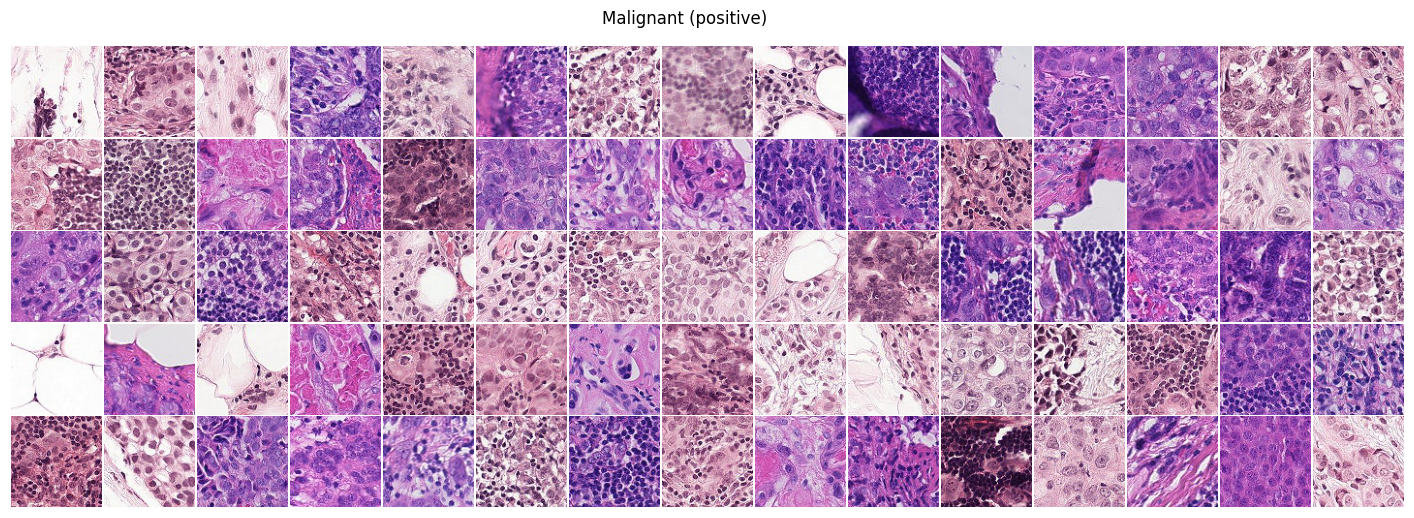

In [15]:
plot_fig(positive,'Malignant (positive)')

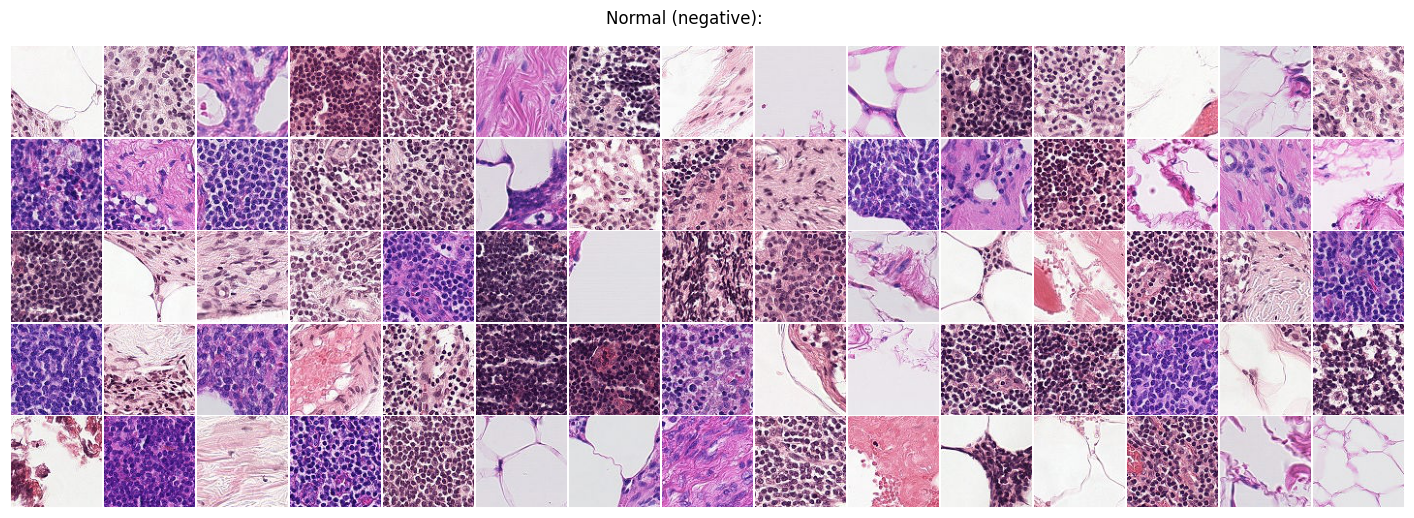

In [16]:
plot_fig(negative,'Normal (negative):')

## - Make Lists of images

In [17]:
# Input Images into the List

train_file_path = '/kaggle/input/histopathologic-cancer-detection/train'
test_file_path = '/kaggle/input/histopathologic-cancer-detection/test'
labels_csv_path = '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'# labels in CSV file

# Read the CSV file include labels
df_labels = pd.read_csv(labels_csv_path)

# Convert the dataframe to a dictionary for faster access to label
label_dict = dict(zip(df_labels['id'], df_labels['label']))

# Two-dimensional list for train
image_list_train = []
for train in os.listdir(train_file_path): 
    if train.endswith(".tif"): 
        file_path = os.path.join(train_file_path, train)
        image_id = train.split(".")[0]  # Remove the .tif extension to find the label
        label = label_dict.get(image_id, "Unknown")  # Get the label from the dictionary (Unknown if doesn't exist)
        image_list_train.append([file_path, label])

# Two-dimensional list for test (No labels)
image_list_test = []
for test in os.listdir(test_file_path): 
    if test.endswith(".tif"): 
        file_path = os.path.join(test_file_path, test)
        # label = "Test"  # Replace the label
        # image_list_test.append([file_path, label])
        image_list_test.append([file_path])


print(image_list_train[:5])


[['/kaggle/input/histopathologic-cancer-detection/train/d43c081bafa286f9c1f7e921883f26ceafebc912.tif', 1], ['/kaggle/input/histopathologic-cancer-detection/train/092d0eedebce504847715ee046b6ad74b57599b4.tif', 0], ['/kaggle/input/histopathologic-cancer-detection/train/b0d2582c6218a8764323fc940b41312282b99bf4.tif', 0], ['/kaggle/input/histopathologic-cancer-detection/train/187c99df762f13f99818e5593d4bab4c6577e7e3.tif', 1], ['/kaggle/input/histopathologic-cancer-detection/train/7c5270c83837de5a5cbb2dca511559dc39d19d53.tif', 1]]


In [18]:
# The Number of Images
train_len = len(image_list_train)
print ("The Number of Histopathologic images in the train dataset: ", train_len)
test_len = len(image_list_test)
print ("The Number of Histopathologic images in the test dataset: ", test_len)

The Number of Histopathologic images in the train dataset:  220025
The Number of Histopathologic images in the test dataset:  57458


## - Calculate the Ratio of Images

0


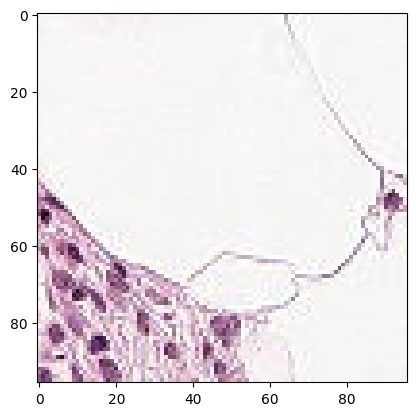

1


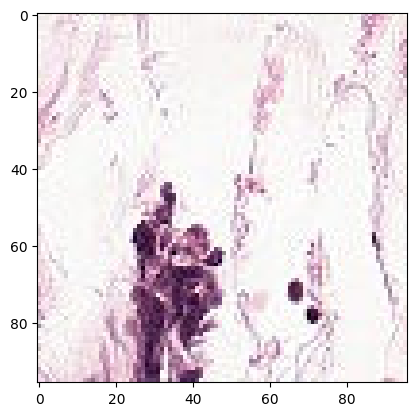

0


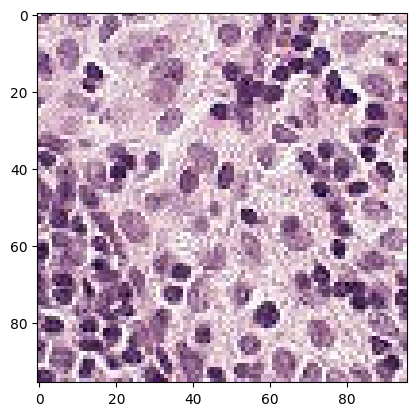

0


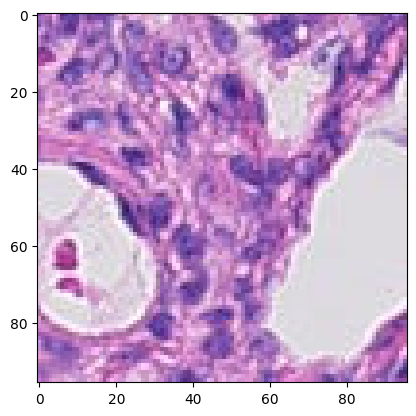

0


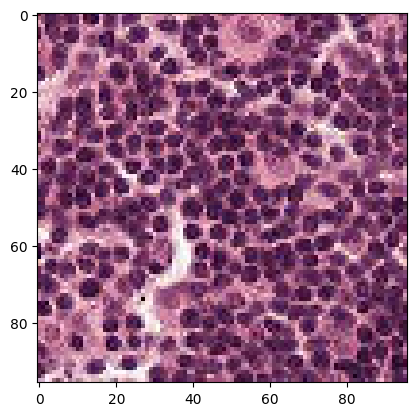

In [19]:
# Show Some Image
for i in range(5):
    img = plt.imread('/kaggle/input/histopathologic-cancer-detection/train/'+df.iloc[i]['id']+'.tif')
    print(df.iloc[i]['label'])
    plt.imshow(img)
    plt.show()

In [20]:
random_img = random.choice(df['id'])
random_img

'0da11110599c64db2d804b18371698fe392da001'

In [21]:
# Calculate the Ratio of Images

# img = '/kaggle/input/histopathologic-cancer-detection/train/'+ df.iloc[0]['id']+'.tif'
img = '/kaggle/input/histopathologic-cancer-detection/train/'+ random_img +'.tif'

image= cv2.imread(img)
height, width= image.shape[:2]
print("The height is ", height)
print("The width is ", width)

The height is  96
The width is  96


# 4. Pre Modeling

## - Define Hyperparameters

> ***Note:***
> - I regarded **height and width** as a **96*96 format**, since overfitting alters it, you can change it to 128 * 128. But it may occur the **time-out error in Kaggle**.
>
> - Additionally, since I used the **GPU T4x2**, which has less RAM than the TP100, and applied **ReduceLR** to dynamically adjust the learning rate to prevent fluctuations, I will test optimal batch size setting the **BatchSize values of 8, 16, and 32**., and finally change the **Batch size to 32**. [In GPU P100 the BatchSize = 64]

In [22]:
Img_height = 96
Img_width = 96
Batch_size = 64 # Since overfitting occurs, and use GPU T4x2 and ReduceLR to adjust the dynamic learning rate.

epochs=10

## - Train_test Split Data

> Split train dataset to: **1.Train = 85%**,  **2.Validation = 15%**

In [23]:
LenTrain = 0.85
LenValid = 0.15

>***Note:***
>
> In ***training*** and ***validation***, the amount of data must be **divisible by the batch size** (i.e., 32). This is crucial because, during model fitting, each batch needs to have exactly the expected number of samples; otherwise, TensorFlow may produce an error in the last batch.
However, this requirement **does not apply** during ***testing***, as the evaluate() and predict() functions do not necessitate batches of uniform size and can handle an incomplete final batch without any issues.

In [24]:
train_size = (int(LenTrain * len(image_list_train)) // Batch_size) * Batch_size
valid_size = (int(LenValid * len(image_list_train)) // Batch_size) * Batch_size
test_size = (int(len(image_list_test) // Batch_size) * Batch_size) # Because I'll use "drop_remainder=True"!
print("Split images in train to: ", "Train =", train_size , " Valid =", valid_size)
print("Also images in test: ", "Test =", test_size)

Split images in train to:  Train = 187008  Valid = 32960
Also images in test:  Test = 57408


In [25]:
data_train = image_list_train[:train_size]
data_valid = image_list_train[train_size:train_size + valid_size]
data_test = image_list_test[:test_size]

## - Image Augmentation and Rescale

> I perform **image augmentation** on the training dataset (rotation, shift, zoom, horizontal flip); however, since the histopathology images are small and it's crucial to preserve information, these modifications are minimal.
> Image augmentations enhance accuracy in the training dataset and improve the validation dataset.

In [26]:
# Image Augmentation and Rescale the "Train Dataset"
trainGenerator = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=15,       # Low rotation (15 degrees)
    width_shift_range=0.1,   # shift (up to 10% of the image)
    height_shift_range=0.1,  
    zoom_range=0.1,          # Low zoom (max 10% resizing)
    horizontal_flip=True,    # Horizontal mirroring
    fill_mode='nearest'      # How to do new pixels
)

# Only Rescale the "Validation Dataset" and "Test Dataset"
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

## - Create Dataframes for Train, Validation and Test

In [27]:
data_train[:10]

[['/kaggle/input/histopathologic-cancer-detection/train/d43c081bafa286f9c1f7e921883f26ceafebc912.tif',
  1],
 ['/kaggle/input/histopathologic-cancer-detection/train/092d0eedebce504847715ee046b6ad74b57599b4.tif',
  0],
 ['/kaggle/input/histopathologic-cancer-detection/train/b0d2582c6218a8764323fc940b41312282b99bf4.tif',
  0],
 ['/kaggle/input/histopathologic-cancer-detection/train/187c99df762f13f99818e5593d4bab4c6577e7e3.tif',
  1],
 ['/kaggle/input/histopathologic-cancer-detection/train/7c5270c83837de5a5cbb2dca511559dc39d19d53.tif',
  1],
 ['/kaggle/input/histopathologic-cancer-detection/train/5a32933e093185f5fc91d30fc83ad571c6818d25.tif',
  1],
 ['/kaggle/input/histopathologic-cancer-detection/train/42e77d193e73811e0bb65a0cbd9b01c5c27900fa.tif',
  0],
 ['/kaggle/input/histopathologic-cancer-detection/train/27bb898f54a0b9345f6c4a9083299e4465860861.tif',
  0],
 ['/kaggle/input/histopathologic-cancer-detection/train/89cd55e4300440612347c38f306da688a166fd40.tif',
  0],
 ['/kaggle/input/hi

In [28]:
data_valid[:10]

[['/kaggle/input/histopathologic-cancer-detection/train/503c7ba564cb23b366594839acf39bb03bc75421.tif',
  1],
 ['/kaggle/input/histopathologic-cancer-detection/train/944802eab3ca98c9c6ba11753a0f007abfb7f989.tif',
  0],
 ['/kaggle/input/histopathologic-cancer-detection/train/082db7ac83be2645bf63af8bb2ee3960ace6a158.tif',
  1],
 ['/kaggle/input/histopathologic-cancer-detection/train/32300e2f360a8312b29a8082343207ee568677d4.tif',
  0],
 ['/kaggle/input/histopathologic-cancer-detection/train/d01e89ebcd6db4ac9c09266119236f3fd07202f8.tif',
  1],
 ['/kaggle/input/histopathologic-cancer-detection/train/ea91c9d4bff84233c38423824d5dcf2eed462141.tif',
  0],
 ['/kaggle/input/histopathologic-cancer-detection/train/e4089b1238eb0c36b588718cefc460ead207e111.tif',
  1],
 ['/kaggle/input/histopathologic-cancer-detection/train/4f6eec3eb95ec11aaa24efa1a2b3491f39d7ef1d.tif',
  0],
 ['/kaggle/input/histopathologic-cancer-detection/train/4a7b837ae01009ae66807f1288dc3ece0e2efbfa.tif',
  0],
 ['/kaggle/input/hi

In [29]:
data_test[:10]

[['/kaggle/input/histopathologic-cancer-detection/test/a7ea26360815d8492433b14cd8318607bcf99d9e.tif'],
 ['/kaggle/input/histopathologic-cancer-detection/test/59d21133c845dff1ebc7a0c7cf40c145ea9e9664.tif'],
 ['/kaggle/input/histopathologic-cancer-detection/test/5fde41ce8c6048a5c2f38eca12d6528fa312cdbb.tif'],
 ['/kaggle/input/histopathologic-cancer-detection/test/bd953a3b1db1f7041ee95ff482594c4f46c73ed0.tif'],
 ['/kaggle/input/histopathologic-cancer-detection/test/523fc2efd7aba53e597ab0f69cc2cbded7a6ce62.tif'],
 ['/kaggle/input/histopathologic-cancer-detection/test/d23c66547f4a00555a174d2fcb860ae399b66edc.tif'],
 ['/kaggle/input/histopathologic-cancer-detection/test/fabf2fca23f71655974767e29eda86a9b2c97a72.tif'],
 ['/kaggle/input/histopathologic-cancer-detection/test/9730b15862516b8641b9f0ff48db660d95031c32.tif'],
 ['/kaggle/input/histopathologic-cancer-detection/test/ee85348c0950c2e639776fb555e3452c1f8437c0.tif'],
 ['/kaggle/input/histopathologic-cancer-detection/test/ef12a0813c504d2d1b

In [30]:
# Create dataframes for train
df_train = pd.DataFrame(data_train,columns = ['id', 'label'])

# Create dataframes for validation
df_valid = pd.DataFrame(data_valid,columns = ['id', 'label'])

# Create dataframes for test
df_test = pd.DataFrame(data_test,columns = ['id'])

In [31]:
print(type(df_valid))

<class 'pandas.core.frame.DataFrame'>


In [32]:
df_train.head()

id  label
0  /kaggle/input/histopathologic-cancer-detection...      1
1  /kaggle/input/histopathologic-cancer-detection...      0
2  /kaggle/input/histopathologic-cancer-detection...      0
3  /kaggle/input/histopathologic-cancer-detection...      1
4  /kaggle/input/histopathologic-cancer-detection...      1

In [33]:
df_valid.head()

id  label
0  /kaggle/input/histopathologic-cancer-detection...      1
1  /kaggle/input/histopathologic-cancer-detection...      0
2  /kaggle/input/histopathologic-cancer-detection...      1
3  /kaggle/input/histopathologic-cancer-detection...      0
4  /kaggle/input/histopathologic-cancer-detection...      1

In [34]:
df_train.shape

(187008, 2)

In [35]:
df_valid.shape

(32960, 2)

In [36]:
df_test.shape

(57408, 1)

In [37]:
df_test.head()

id
0  /kaggle/input/histopathologic-cancer-detection...
1  /kaggle/input/histopathologic-cancer-detection...
2  /kaggle/input/histopathologic-cancer-detection...
3  /kaggle/input/histopathologic-cancer-detection...
4  /kaggle/input/histopathologic-cancer-detection...

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187008 entries, 0 to 187007
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      187008 non-null  object
 1   label   187008 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


### - Convert numeric values of label column to string

In [39]:
# Convert numeric values of label column to string
df_train['label'] = df_train['label'].astype(str)
df_valid['label'] = df_valid['label'].astype(str)

In [40]:
df_train.head()

id label
0  /kaggle/input/histopathologic-cancer-detection...     1
1  /kaggle/input/histopathologic-cancer-detection...     0
2  /kaggle/input/histopathologic-cancer-detection...     0
3  /kaggle/input/histopathologic-cancer-detection...     1
4  /kaggle/input/histopathologic-cancer-detection...     1

In [41]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      32960 non-null  object
 1   label   32960 non-null  object
dtypes: object(2)
memory usage: 515.1+ KB


## - Input Model

>***Note:***
>
> Since the model has a scalar (0 or 1) and an output node with a **sigmoid** function, the **class_mode** is set to **'binary'** in **train** and **validation** dataset.

In [42]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe = df_train,
  class_mode= "binary",  # class_mode set to 'binary'
  x_col = "id",
  y_col = "label",
  batch_size = Batch_size,
  seed = 42,
  shuffle = True,
  target_size = (Img_height,Img_width), #set the height and width of the images
  #drop_remainder=True  # The flow_from_dataframe or flow_from_directory functions do not support this parameter.
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe = df_valid,
  class_mode = "binary", # class_mode set to 'binary'
  x_col = "id",
  y_col = "label",
  batch_size = Batch_size,
  seed = 42,
  shuffle = True,
  target_size = (Img_height,Img_width),
  #drop_remainder=True
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe = df_test,
  class_mode = None, # Because it doesn't have any label
  x_col = "id",
  y_col = None, # Because it doesn't have any label
  batch_size = Batch_size,
  seed = 42,
  shuffle = False, # No need to shuffle test data
  target_size = (Img_height,Img_width),
)


Found 187008 validated image filenames belonging to 2 classes.
Found 32960 validated image filenames belonging to 2 classes.
Found 57408 validated image filenames.


## - Data Distribution Across GPUs

To effectively distribute the data, **strategy.experimental_distribute_dataset()** was utilized. This enables a more efficient **distribution of data across GPUs**.

> When using the **GPU T4x2** in Kaggle with **MirroredStrategy** enabled to utilize the model on two GPUs, it is necessary to use `tf.data.Dataset.from_generator` for **trainDataset** and **valDataset**, as flow_from_dataframe cannot be directly used with MirroredStrategy. However, this is not required for test data, where prediction and evaluation are conducted.

In [43]:
# A function that converts the Generator to a tf.data.Dataset [Usable for training, validation, and testing datasets]
def dataset_from_generator(generator, has_labels=True):
    if has_labels:
        dataset = tf.data.Dataset.from_generator(
            lambda: generator,
            output_signature=(
                tf.TensorSpec(shape=(None, Img_height, Img_width, 3), dtype=tf.float32),
                tf.TensorSpec(shape=(None,), dtype=tf.float32)
            )
        )
    else:
        dataset = tf.data.Dataset.from_generator(
            lambda: generator,
            output_signature=tf.TensorSpec(shape=(None, Img_height, Img_width, 3), dtype=tf.float32)
        )
    # Since we are using multiple GPUs, never forget 'drop_remainder=True'! Otherwise the second GPU may not receive data in the last batch.
    # Safely unbatch and re-batch
    return dataset.unbatch().batch(Batch_size, drop_remainder=True)

# 5) Define Functions: Save and Load, Train Model, and Visualization Result

## - Define Save and Load Functions

We need to define the `save` and `load` **functions** to preserve the model and its results for use in subsequent runs and to retrieve them.

In [44]:
# Load
def load_training_history(history_file):
    if os.path.exists(history_file):
        try:
            data = np.load(history_file)
            print(">>> Load Previous history ...")
            return (list(data['acc']) if 'acc' in data else [], 
                    list(data['val_acc']) if 'val_acc' in data else [],
                    list(data['loss']) if 'loss' in data else [],
                    list(data['val_loss']) if 'val_loss' in data else [])
        except Exception as e:
            print(f"⚠️ Error loading history: {e}")
            return [], [], [], []
    else:
        print("*** First run: Model training starts from scratch ... ")
        return [], [], [], []
# Save
def save_training_history(history_file, full_acc, full_val_acc, full_loss, full_val_loss):
    try:
        np.savez(history_file, acc=full_acc, val_acc=full_val_acc, loss=full_loss, val_loss=full_val_loss)
        print("Training history saved!")
    except Exception as e:
        print(f"⚠️ Error save history: {e}")

## - Define Train Model Function

In the **train_model** function, I utilize `reduce_lr`, `early_stopping`, and `checkpoint` in **callbacks**, and also `save` and `load` the history of the training model (epochs). 
The function creates a new model or loads the model (if it has already been trained and the results have been saved) and continues training. 

The Function parameters:

- model_name: Model file name to save and load
- model_fn: Function that creates the new model
- trainDataset: Training dataset
- valDataset: Validation dataset
- epochs: Number of new epochs to train

> ***Note:* Keras no longer supports the ".h5" format for ModelCheckpoint!**
> 
> In the **latest versions of TensorFlow/Keras**, the `ModelCheckpoint` function only saves models in the **".keras"** format.

In [45]:
# Define MirroredStrategy only once, outside the `train_model` function

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(f"✅ GPUs detected: {[gpu.name for gpu in gpus]}")
    strategy = tf.distribute.MirroredStrategy()
else:
    print("⚠ No GPU detected! Running on CPU.")
    strategy = tf.distribute.OneDeviceStrategy(device="/CPU:0")


✅ GPUs detected: ['/physical_device:GPU:0', '/physical_device:GPU:1']


In [46]:
def train_model(model_name, model_fn, trainDataset, valDataset, testDataset, epochs):
    
    # 0) Clear previous session to avoid shape mismatch or residual graph issues
    K.clear_session()
    gc.collect()
    tf.compat.v1.reset_default_graph()
    
    # 1) History management
    history_file = f"{model_name}_history.npz"
    prev_acc, prev_val_acc, prev_loss, prev_val_loss = load_training_history(history_file)

    # 2) Using MirroredStrategy: Build or load model inside strategy scope
        # - Strategy already defined outside; use it here
    with strategy.scope():
        if os.path.exists(model_name):
            print(f">>> Loading the model from '{model_name}' to continue training...")
            model = tf.keras.models.load_model(model_name)  
        else:
            print(f"*** Building a new model and starting training ...")
            model = model_fn()  
            model.compile(loss=BinaryCrossentropy(),
                          optimizer=Adam(learning_rate=0.001), # The Best Result [Change from learning_rate=0.002 and 0.0005]
                          metrics=['accuracy'])        

    if not os.path.exists(model_name):
        model.summary()

    print(f"[INFO] Dataset sizes -> train: {len(trainDataset)}, valid: {len(valDataset)}, test: {len(testDataset)}")
    assert len(trainDataset) % strategy.num_replicas_in_sync == 0, "Train dataset not divisible by number of GPUs"

    # 3) Convert DataGenerator to tf.data.Dataset and preprocess
        # - Optimizing processing and preventing slowdowns can be achieved by "adding prefetch".
    trainDataset_tf = dataset_from_generator(trainDataset, has_labels=True).prefetch(tf.data.AUTOTUNE)
    valDataset_tf   = dataset_from_generator(valDataset, has_labels=True).prefetch(tf.data.AUTOTUNE)
    testDataset_tf  = dataset_from_generator(testDataset, has_labels=False).prefetch(tf.data.AUTOTUNE)


    # 4) Set Callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
    checkpoint = ModelCheckpoint(model_name, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    callbacks = [reduce_lr, early_stopping, checkpoint]

    # 5) Check batch shape of input data before training
    
    for sample_batch in trainDataset_tf.take(1):
        if isinstance(sample_batch, tuple):
            print("Batch shape (X):", sample_batch[0].shape)
            print("Batch shape (Y):", sample_batch[1].shape)
        else:
            print("Batch shape:", sample_batch.shape)


    # 6) Model training
        # - We must define steps to limit the number of execution steps; otherwise, execution may continue indefinitely.
        # - Note: Since flow_from_dataframe has been used before, its output works in batches, and the length (len(generator)) is the number of batches. 
          # [Therefore, there is no need for "// Batch_size" on trainDataset or valDataset unless we want to consider a smaller amount of data!]
    steps_per_epoch = len(trainDataset) ##// Batch_size # [Batch_size = 32]
    print("steps_per_epoch =", steps_per_epoch )
    validation_steps = len(valDataset) ##// Batch_size
    test_steps = df_test.shape[0] // Batch_size  # Only the full batches will be used  
    valid_test_count = test_steps * Batch_size
    
    history = model.fit(
        trainDataset_tf,
        epochs=epochs,
        validation_data=valDataset_tf,
        callbacks=callbacks,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps
    )


    # 7) Merge previous history with new data
    full_acc = prev_acc + history.history['accuracy']
    full_val_acc = prev_val_acc + history.history['val_accuracy']
    full_loss = prev_loss + history.history['loss']
    full_val_loss = prev_val_loss + history.history['val_loss']
    print('Merged')
        # Save new history
    save_training_history(history_file, full_acc, full_val_acc, full_loss, full_val_loss)
    print('saved')

    # 8) Evaluate and predict the saved model
        # Verifying that the model has been successfully loaded [Note: If this code is not written, loading and execution may stop]
    if os.path.exists(model_name):
        print(f"✅ Model '{model_name}' exists. Loading...")
        best_model = tf.keras.models.load_model(model_name)
    else:
        print(f"❌ Model '{model_name}' NOT found!")
        return 
        # - Evaluating the validation dataset
    print('Evaluated')
    loss, acc = best_model.evaluate(valDataset, verbose=1, steps=validation_steps) ## valDataset_tf
    print(f"✅ Model '{model_name}' -> Loss: {loss:.4f}, Accuracy: {acc:.4f}")
    
        # - Predicting the test dataset
    print("🔍 Predicting on test dataset...")
    # testDataset_tf = testDataset_tf.cache()
    predictions = best_model.predict(testDataset, verbose=1, steps=test_steps) ## testDataset_tf
    binary_predictions = (predictions > 0.5).astype(int).flatten() # Convert [0,1] predictions to 0 or 1
    print(binary_predictions[:20])

    # 9) Create a DataFrame from the model's prediction results and save it to a CSV file.
    ids = df_test['id'].values[:valid_test_count] # Extracting ids from df_test [Match with only the IDs that correspond to used test samples]
    
    output_df = pd.DataFrame({
        'id': ids,
        'label': binary_predictions
    })
    output_filename = f"{model_name.replace('.keras', '')}_predictions.csv"
    output_df.to_csv(output_filename, index=False)
    print(f"📁 Predictions saved to '{output_filename}'")

    return best_model 


## - Define Visualization Functions

I used four functions to display the training history and comparison models. Two functions to display the history of **accuracy** and **loss** during model training, and two functions to compare the accuracy and loss of the models on validation data together.

In [47]:
# History loading function and visualization "Accuracy" plot
def plot_accuracy(model_name):
    history_file = f"{model_name}_history.npz"
    if not os.path.exists(history_file):
        print("⚠️No history was found for this model.")
        return

    data = np.load(history_file)
    acc = data['acc']
    val_acc = data['val_acc']

    plt.figure(figsize=(8, 6))
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Number of epochs & Accuracy in - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

# History loading function and visualization "Loss" plot
def plot_loss(model_name):
    history_file = f"{model_name}_history.npz"
    if not os.path.exists(history_file):
        print("⚠️No history was found for this model.")
        return

    data = np.load(history_file)
    loss = data['loss']
    val_loss = data['val_loss']

    plt.figure(figsize=(8, 6))
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Number of epochs & Loss in - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

# Function to compare the "Accuracy" of multiple models together
def compare_models_accuracy(models):
    plt.figure(figsize=(10, 6))
    
    for model_name in models:
        history_file = f"{model_name}_history.npz"
        if os.path.exists(history_file):
            data = np.load(history_file)
            plt.plot(data['acc'], label=f"{model_name} - Train")
            plt.plot(data['val_acc'], linestyle='dashed', label=f"{model_name} - Val")
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Models - Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Function to compare the "Loss" of multiple models together
def compare_models_loss(models):
    plt.figure(figsize=(10, 6))
    
    for model_name in models:
        history_file = f"{model_name}_history.npz"
        if os.path.exists(history_file):
            data = np.load(history_file)
            plt.plot(data['loss'], label=f"{model_name} - Train")
            plt.plot(data['val_loss'], linestyle='dashed', label=f"{model_name} - Val")
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Comparison of Models - Loss')
    plt.legend()
    plt.grid()
    plt.show()


# 6) Modeling: AlexNet, VGGNet, and ResNet

In [48]:
print ('Remeber That;')
print ('The Size of input Images in the Modle are: ',Img_height,'*', Img_width)

print ('The Batch Size is: ', Batch_size)


Remeber That;
The Size of input Images in the Modle are:  96 * 96
The Batch Size is:  64


In [49]:
##
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("GPUs are ready:", gpus)
else:
    print("No GPU detected!")

GPUs are ready: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


## - I) AlexNet

**AlexNet**; One of the first deep convolutional neural networks (CNNs) that popularized deep learning in computer vision. It introduced ReLU activation, dropout, and efficient GPU training.

In [50]:
def AlexNet():
    inp = layers.Input((Img_height,Img_width, 3)) 

    x = layers.Conv2D(96, 7, 2, activation='relu', padding='same', kernel_regularizer=l2(0.0001))(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2, padding='same')(x)

    x = layers.Conv2D(256, 5, 1, activation='relu', padding='same', kernel_regularizer=l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2, padding='same')(x)

    x = layers.Conv2D(384, 3, 1, activation='relu', padding='same', kernel_regularizer=l2(0.0001))(x)
    x = layers.Conv2D(384, 3, 1, activation='relu', padding='same', kernel_regularizer=l2(0.0001))(x)
    x = layers.Conv2D(256, 3, 1, activation='relu', padding='same', kernel_regularizer=l2(0.0001))(x)
    x = layers.MaxPooling2D(3, 2, padding='same')(x)

    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu', kernel_regularizer=l2(0.0001))(x) # Since overfitting occurs (Add L2) 
    x = layers.Dropout(0.5)(x) # Since overfitting occurs
    x = layers.Dense(4096, activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.Dropout(0.5)(x) # Since overfitting occurs

    x = layers.Dense(1, activation='sigmoid')(x)  # One-dimensional output for binary classification
   
    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex


In [51]:
# ُShape of a random Input of images
sample_img, _ = next(iter(trainDataset)) 
print("Image shape from dataset:", sample_img.shape)

Image shape from dataset: (64, 96, 96, 3)


In [52]:
# Utilize train_model Function to Model (epochs=10)

train_model("AlexNet.keras", AlexNet, trainDataset, valDataset, testDataset, epochs)

*** First run: Model training starts from scratch ... 
*** Building a new model and starting training ...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 96)          │          14,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,266,113 (222.27 MB)

 Trainable params: 58,265,409 (222.26 MB)

 Non-trainable params: 704 (2.75 KB)

[INFO] Dataset sizes -> train: 2922, valid: 515, test: 897
Batch shape (X): (64, 96, 96, 3)
Batch shape (Y): (64,)
steps_per_epoch = 2922
Epoch 1/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.7975 - loss: 1.3210
Epoch 1: val_loss improved from inf to 0.67122, saving model to AlexNet.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 2335s 796ms/step - accuracy: 0.7975 - loss: 1.3208 - val_accuracy: 0.7737 - val_loss: 0.6712 - learning_rate: 0.0010
Epoch 2/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.8308 - loss: 0.4995
Epoch 2: val_loss did not improve from 0.67122
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 954s 326ms/step - accuracy: 0.8308 - loss: 0.4995 - val_accuracy: 0.7320 - val_loss: 0.7538 - learning_rate: 0.0010
Epoch 3/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.8430 - loss: 0.4190
Epoch 3: val_loss improved from 0.67122 to 0.57254, saving model to AlexNet.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 950s 325ms/step - accuracy: 0.8430 - loss: 0.4190 - val_acc

<Functional name=functional, built=True>

### - Visualization Output

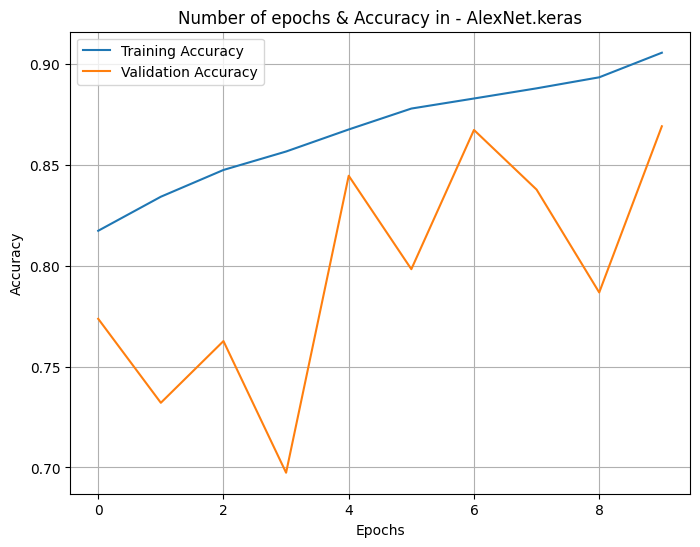

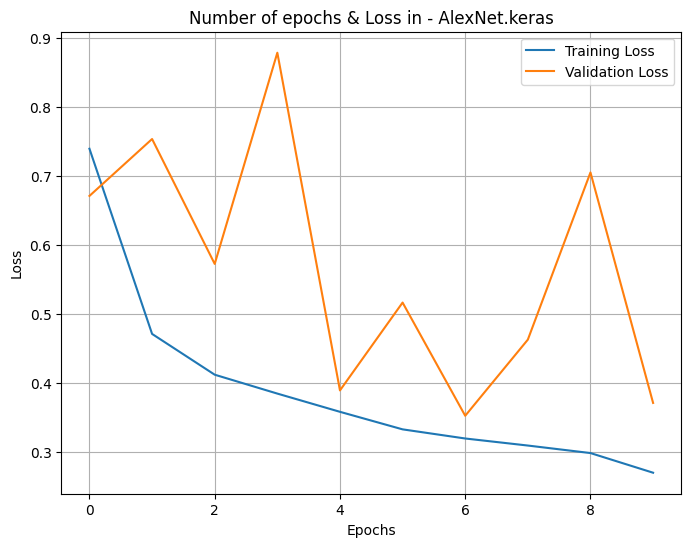

In [53]:
# Visualize Accuracy history
plot_accuracy("AlexNet.keras")

# Visualize loss history
plot_loss("AlexNet.keras")

## - II) VGGNet

**VGGNet**; Known for its deep but simple architecture with small 3×3 convolutional filters. It is widely used for feature extraction and transfer learning.

> In the ordinary VGG model, for 224x224 inputs, five MaxPoolings are considered. But **four** times is enough for our small images (96x96). Also, to avoid possible errors in the "Flatten layer," I **reduced the number of Dense filters** (1024 or 2048).

In [54]:
#VGGNet

def VGGNet():
    inp = layers.Input((Img_height,Img_width, 3))
    
    x = layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(inp) # Since overfitting occurs (Add L2)
    x = layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)  # (48, 48, 64)

    x = layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)  # (24, 24, 128)

    x = layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)  # (12, 12, 256)

    x = layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)  # (6, 6, 512)

    """
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.0005))(x)  # Reduce the number of nodes from 2048
    x = layers.Dropout(0.5)(x) # Since overfitting occurs
    x = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(x)  # Reduce the number of nodes from 1024
    x = layers.Dropout(0.5)(x) # Since overfitting occurs
    x = layers.Dense(1, activation='sigmoid')(x)  # Binary output

    model_VGG = models.Model(inputs=inp, outputs=x)
    """

    # Classifier
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(x) # Reduce the number of nodes
    x = layers.Dropout(0.4)(x) # Since overfitting occurs
    x = layers.Dense(1, activation='sigmoid')(x) # Binary output

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG


In [55]:
# Utilize train_model Function to Model (epochs=10)

train_model("VGGNet.keras", VGGNet, trainDataset, valDataset, testDataset, epochs)

*** First run: Model training starts from scratch ... 
*** Building a new model and starting training ...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 96, 96, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,077,313 (65.14 MB)

 Trainable params: 17,075,393 (65.14 MB)

 Non-trainable params: 1,920 (7.50 KB)

[INFO] Dataset sizes -> train: 2922, valid: 515, test: 897
Batch shape (X): (64, 96, 96, 3)
Batch shape (Y): (64,)
steps_per_epoch = 2922
Epoch 1/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.7691 - loss: 1.2701
Epoch 1: val_loss improved from inf to 1.05353, saving model to VGGNet.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 1015s 345ms/step - accuracy: 0.7691 - loss: 1.2699 - val_accuracy: 0.5946 - val_loss: 1.0535 - learning_rate: 0.0010
Epoch 2/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.8512 - loss: 0.4530
Epoch 2: val_loss improved from 1.05353 to 0.75268, saving model to VGGNet.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 880s 301ms/step - accuracy: 0.8512 - loss: 0.4529 - val_accuracy: 0.7497 - val_loss: 0.7527 - learning_rate: 0.0010
Epoch 3/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.8822 - loss: 0.3505
Epoch 3: val_loss improved from 0.75268 to 0.31303, saving model to VGGNet.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 918s 314ms/step - accuracy:

<Functional name=functional, built=True>

### - Visualization Output

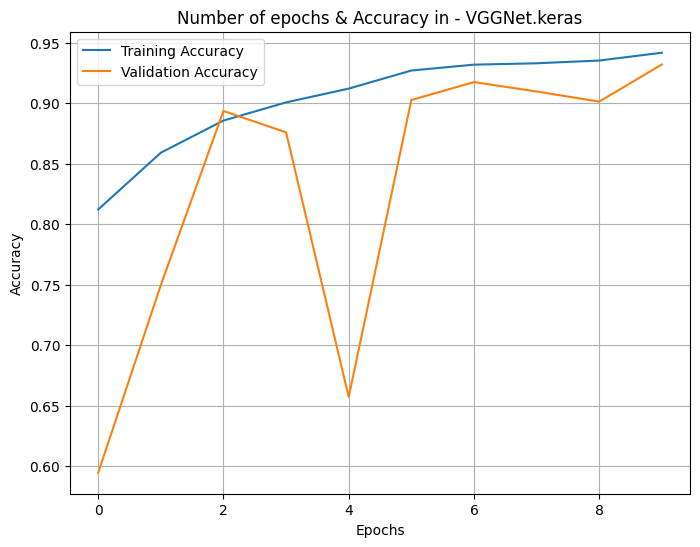

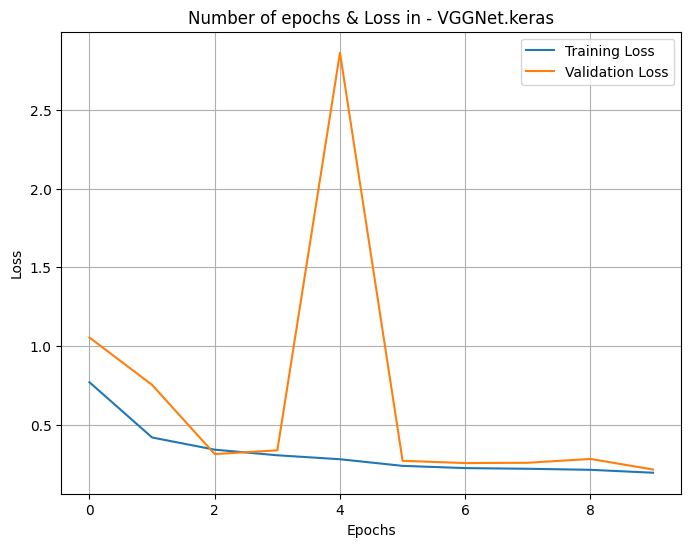

In [56]:
# Visualize Accuracy history
plot_accuracy("VGGNet.keras")

# Visualize Loss history
plot_loss("VGGNet.keras")

## - III) ResNet

**ResNet**; Introduced residual connections (skip connections) to solve the vanishing gradient problem, allowing the training of very deep networks efficiently.

For 96x96 images,at the **first layers** 3x3 kernel with stride one was used. Stride tow was also used in the **middle layers** to prevent feature dimensions from shrinking too quickly. And adding **Skip Connections** for ResNet model.

In [57]:
# ResNet

# Skip Connection
def residual_block(x, filters):
    shortcut = x 
    
    x = layers.Conv2D(filters, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x) # Since overfitting occurs (Add L2)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, 3, padding='same', activation=None, kernel_regularizer=l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    
    # Add Skip Connection
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    
    return x
    

def ResNet34():
    inp = layers.Input((Img_height,Img_width, 3))
    
    # The initial layer
    x = layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
    
    # ResNet blocks
    for _ in range(3):   # 3 blocks with 64 filters
        x = residual_block(x, 64)
    
    x = layers.Conv2D(128, 3, strides=2, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x) 
    x = layers.BatchNormalization()(x)
    
    for _ in range(4):
        x = residual_block(x, 128)
    
    x = layers.Conv2D(256, 3, strides=2, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    
    for _ in range(6):
        x = residual_block(x, 256)
    
    x = layers.Conv2D(512, 3, strides=2, padding='same', activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    
    for _ in range(3):
        x = residual_block(x, 512)
    
    # The final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = layers.Dropout(0.5)(x) # Since overfitting occurs
    x = layers.Dense(1, activation='sigmoid')(x)  
    
    model = models.Model(inputs=inp, outputs=x)
    return model


In [58]:
# Utilize train_model Function to Model (epochs=10)

train_model("ResNet34.keras", ResNet34, trainDataset, valDataset, testDataset, epochs)

*** First run: Model training starts from scratch ... 
*** Building a new model and starting training ...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 96, 96, 64)     │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 96, 96, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 48, 48, 64)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 48, 48, 64)     │         36,928 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 48, 48, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 48, 48, 64)     │         36,928 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 48, 48, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 48, 48, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 48, 48, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 48, 48, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 48, 48, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 48, 48, 64)     │         36,928 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 48, 48, 64)     │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 48, 48, 64)     │              0 │ batch_normalization_4… │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activat

 Total params: 24,490,241 (93.42 MB)

 Trainable params: 24,473,217 (93.36 MB)

 Non-trainable params: 17,024 (66.50 KB)

[INFO] Dataset sizes -> train: 2922, valid: 515, test: 897
Batch shape (X): (64, 96, 96, 3)
Batch shape (Y): (64,)
steps_per_epoch = 2922
Epoch 1/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.8211 - loss: 0.9390
Epoch 1: val_loss improved from inf to 1.00442, saving model to ResNet34.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 1111s 372ms/step - accuracy: 0.8211 - loss: 0.9389 - val_accuracy: 0.6973 - val_loss: 1.0044 - learning_rate: 0.0010
Epoch 2/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.8774 - loss: 0.3749
Epoch 2: val_loss improved from 1.00442 to 0.38371, saving model to ResNet34.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 1033s 354ms/step - accuracy: 0.8774 - loss: 0.3749 - val_accuracy: 0.8709 - val_loss: 0.3837 - learning_rate: 0.0010
Epoch 3/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.8953 - loss: 0.3254
Epoch 3: val_loss improved from 0.38371 to 0.34732, saving model to ResNet34.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 1057s 362ms/step - a

<Functional name=functional, built=True>

### - Visualization Output

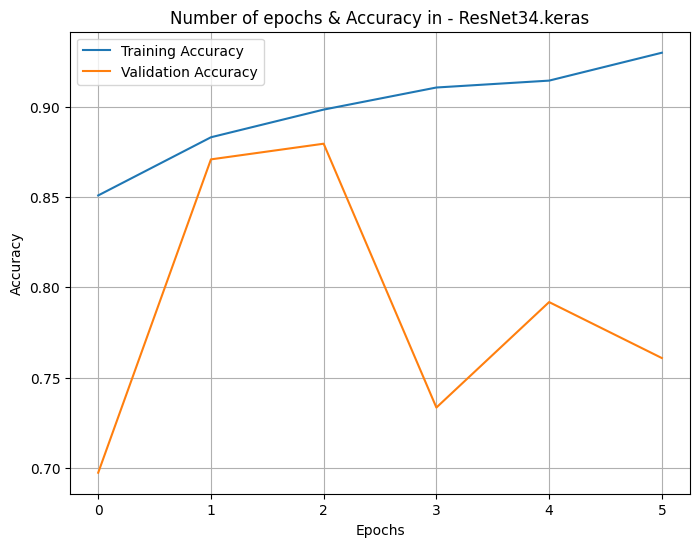

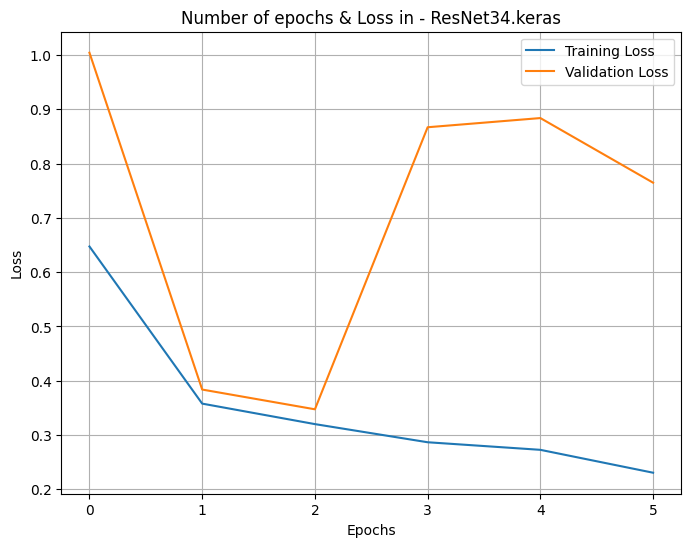

In [59]:
# Visualize Accuracy history
plot_accuracy("ResNet34.keras")

# Visualize Loss history
plot_loss("ResNet34.keras")

## - Result

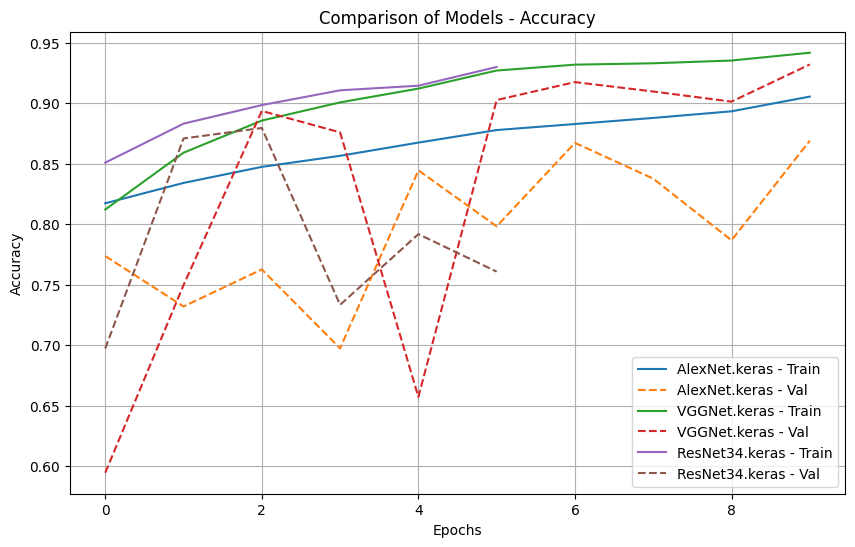

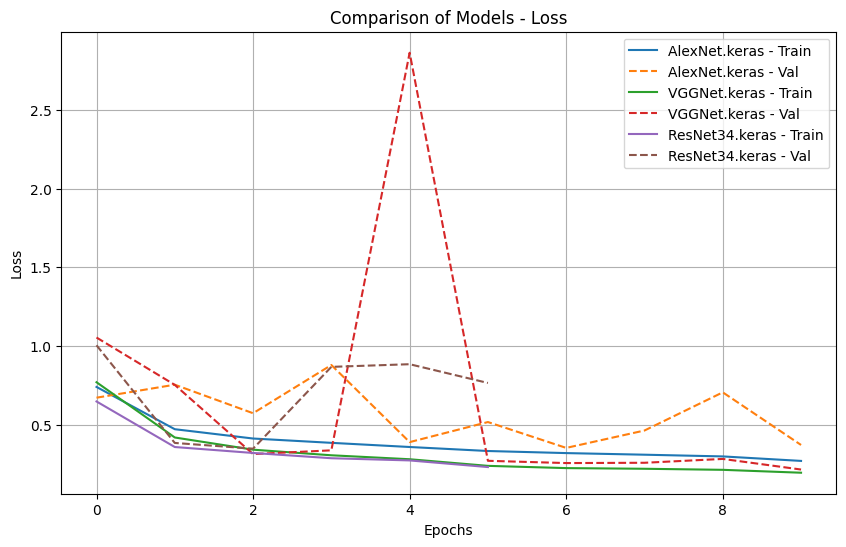

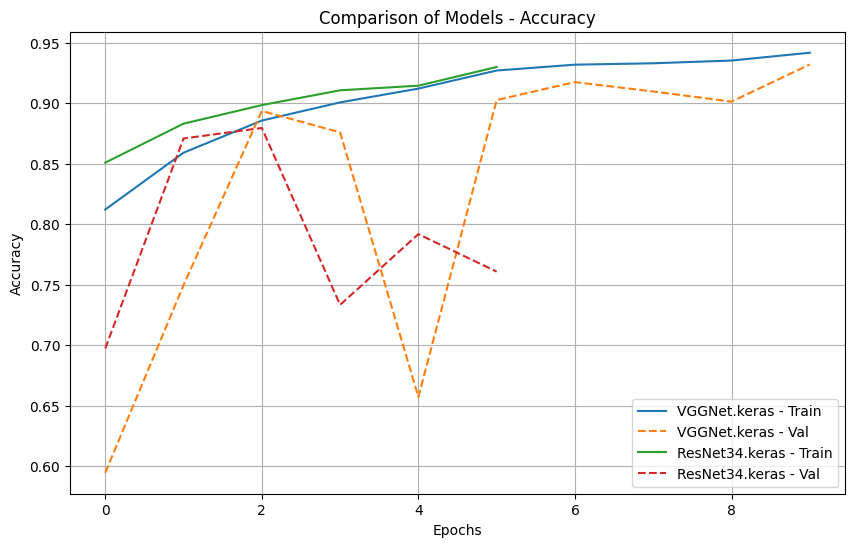

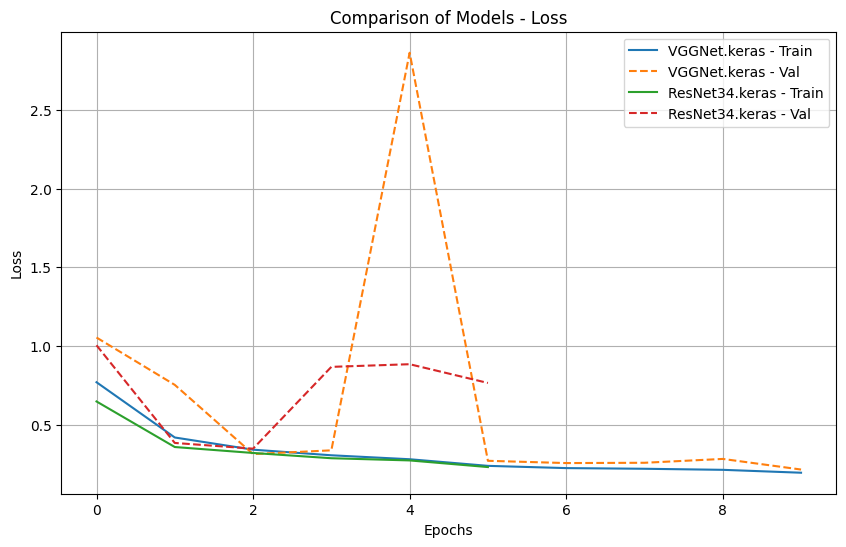

In [60]:
# Comparison of "AlexNet", "VGGNet", "ResNet34" models [Accuracy & Loss]
compare_models_accuracy(["AlexNet.keras", "VGGNet.keras", "ResNet34.keras"])
compare_models_loss(["AlexNet.keras", "VGGNet.keras", "ResNet34.keras"])
compare_models_accuracy(["VGGNet.keras", "ResNet34.keras"])
compare_models_loss(["VGGNet.keras", "ResNet34.keras"])

# 7. Modeling: EfficientNet

**EfficientNet**; A family of models that optimize accuracy and efficiency using compound scaling, balancing network width, depth, and resolution for better performance with fewer parameters.


> I use three versions of EfficientNet: **EfficientNetB0**, **EfficientNetB1** and **EfficientNetB2**. I believe that more powerful versions, like EfficientNetB4, may be overly complex for input dimensions of **96*96 pixels**. Also I utilized **pre-trained weights** to fine-tune only the outer layers of the new dataset. This approach helps to **reduce computational** costs and allows the model to achieve higher accuracy more quickly, even with less data. [ I change the settings by updating **"weights=None"** to **"weights='imagenet'"** and setting **"base_model.trainable=True"** to **"base_model.trainable=False**." ]


In [61]:
# Using weights="imagenet" for pre-trained weights
def efficientnet(model_type, input_shape=(Img_height,Img_width, 3), num_classes=1):
    if model_type == "B0":
        base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
    elif model_type == "B1":
        base_model = EfficientNetB1(weights="imagenet", include_top=False, input_shape=input_shape)
    elif model_type == "B2":
        base_model = EfficientNetB2(weights="imagenet", include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Invalid model type. Choose 'B0', 'B1' or 'B2'")
    
    # Freeze base model
    base_model.trainable = False  # Set False to use pre-trained weights
    
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.0001))(x) # Since overfitting occurs (Add L2)
    x = layers.Dropout(0.4)(x) # Since overfitting occurs
    output = layers.Dense(num_classes, activation='sigmoid')(x)  # Binary classification
    
    model = models.Model(inputs=base_model.input, outputs=output)
    
    return model

## - I) EfficientNetB0

> **Note:** If we pass **efficientnet("B0")** directly, the model will be built immediately, but we want it to be built only at runtime.
I'll use "**lambda: efficientnet("B0")**", which gives train_model just one function and executes it later.

In [62]:
# Utilize train_model Function to Model (epochs=10)

train_model("EfficientNetB0.keras", lambda: efficientnet("B0"), trainDataset, valDataset, testDataset, epochs)

*** First run: Model training starts from scratch ... 
*** Building a new model and starting training ...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 96, 96, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 96, 96, 3)      │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 96, 96, 3)      │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 97, 97, 3)      │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 48, 48, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 48, 48, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 48, 48, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 48, 48, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 48, 48, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 48, 48, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,705,956 (17.95 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

[INFO] Dataset sizes -> train: 2922, valid: 515, test: 897
Batch shape (X): (64, 96, 96, 3)
Batch shape (Y): (64,)
steps_per_epoch = 2922
Epoch 1/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.5887 - loss: 0.6985
Epoch 1: val_loss improved from inf to 0.67630, saving model to EfficientNetB0.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 855s 289ms/step - accuracy: 0.5887 - loss: 0.6985 - val_accuracy: 0.5927 - val_loss: 0.6763 - learning_rate: 0.0010
Epoch 2/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.5944 - loss: 0.6758
Epoch 2: val_loss improved from 0.67630 to 0.67478, saving model to EfficientNetB0.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 794s 272ms/step - accuracy: 0.5944 - loss: 0.6758 - val_accuracy: 0.5956 - val_loss: 0.6748 - learning_rate: 0.0010
Epoch 3/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.5952 - loss: 0.6749
Epoch 3: val_loss did not improve from 0.67478
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 789s 270ms/step - accuracy: 0.5952 - loss: 0.6

<Functional name=functional, built=True>

### - Visualization Output

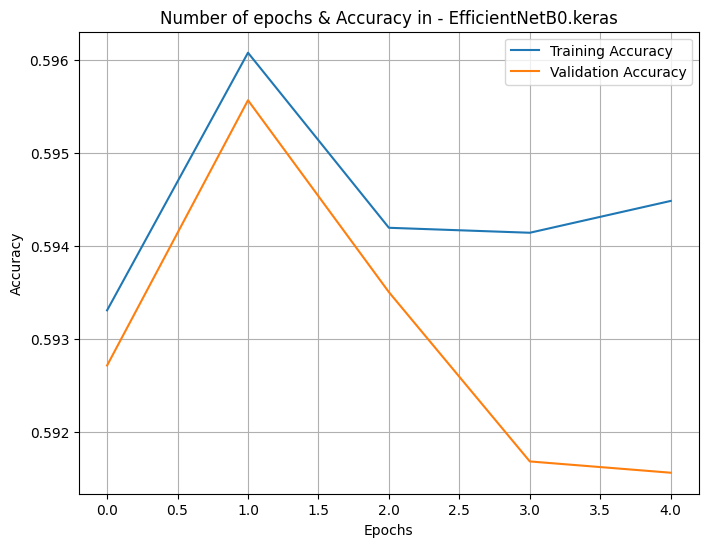

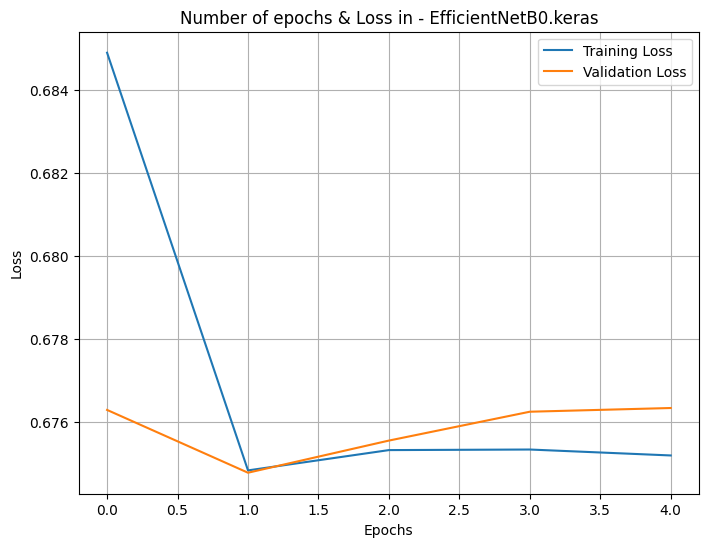

In [63]:
# Visualize Accuracy history
plot_accuracy("EfficientNetB0.keras")

# Visualize Loss history
plot_loss("EfficientNetB0.keras")

## - II) EfficientNetB1

In [64]:
# Utilize train_model Function to Model (epochs=10)

train_model("EfficientNetB1.keras", lambda: efficientnet("B1"), trainDataset, valDataset, testDataset, epochs)

*** First run: Model training starts from scratch ... 
*** Building a new model and starting training ...
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 96, 96, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 96, 96, 3)      │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 96, 96, 3)      │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 97, 97, 3)      │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 48, 48, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 48, 48, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 48, 48, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 48, 48, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 48, 48, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 48, 48, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 7,231,624 (27.59 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 6,575,239 (25.08 MB)

[INFO] Dataset sizes -> train: 2922, valid: 515, test: 897
Batch shape (X): (64, 96, 96, 3)
Batch shape (Y): (64,)
steps_per_epoch = 2922
Epoch 1/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.5881 - loss: 0.6976
Epoch 1: val_loss improved from inf to 0.67552, saving model to EfficientNetB1.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 842s 284ms/step - accuracy: 0.5881 - loss: 0.6976 - val_accuracy: 0.5945 - val_loss: 0.6755 - learning_rate: 0.0010
Epoch 2/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.5948 - loss: 0.6756
Epoch 2: val_loss did not improve from 0.67552
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 836s 286ms/step - accuracy: 0.5948 - loss: 0.6756 - val_accuracy: 0.5926 - val_loss: 0.6756 - learning_rate: 0.0010
Epoch 3/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.5943 - loss: 0.6753
Epoch 3: val_loss improved from 0.67552 to 0.67327, saving model to EfficientNetB1.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 825s 282ms/step - accuracy: 0.5943 - loss: 0.6

<Functional name=functional, built=True>

### - Visualization Output

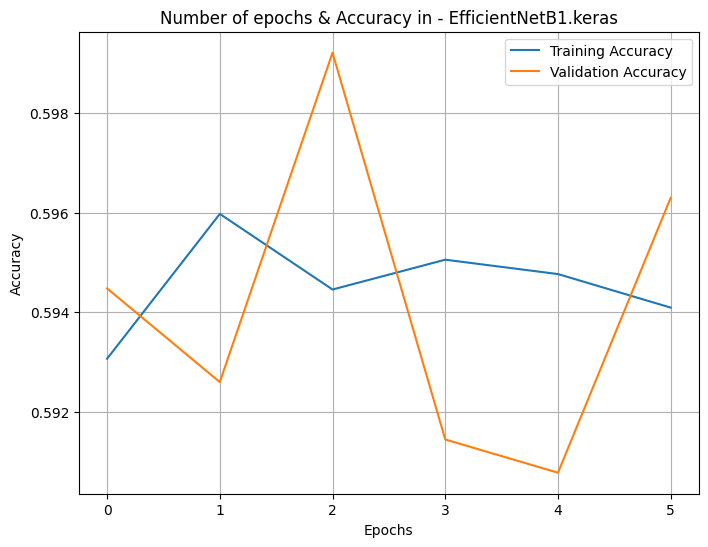

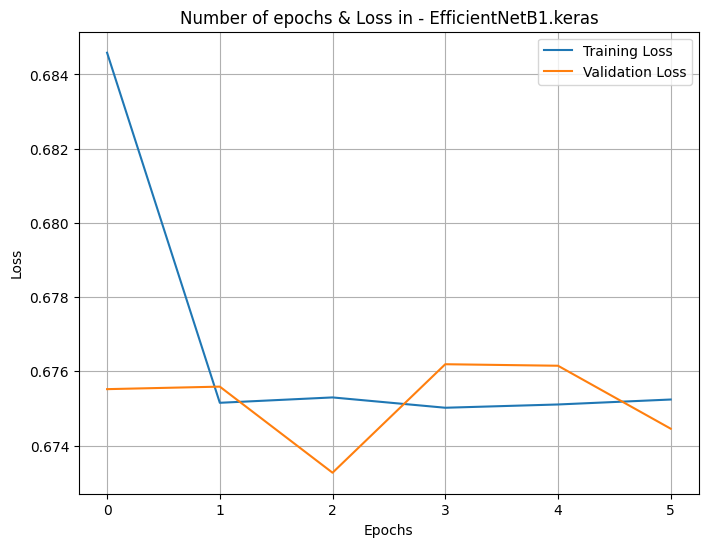

In [65]:
# Visualize Accuracy history
plot_accuracy("EfficientNetB1.keras")

# Visualize Loss history
plot_loss("EfficientNetB1.keras")

## - III) EfficientNetB2

In [66]:
# Utilize train_model Function to Model (epochs=10)

train_model("EfficientNetB2.keras", lambda: efficientnet("B2"), trainDataset, valDataset, testDataset, epochs)

*** First run: Model training starts from scratch ... 
*** Building a new model and starting training ...
31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 96, 96, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 96, 96, 3)      │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 96, 96, 3)      │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 97, 97, 3)      │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 48, 48, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 48, 48, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 48, 48, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 48, 48, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 48, 48, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 48, 48, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 8,490,490 (32.39 MB)

 Trainable params: 721,921 (2.75 MB)

 Non-trainable params: 7,768,569 (29.63 MB)

[INFO] Dataset sizes -> train: 2922, valid: 515, test: 897
Batch shape (X): (64, 96, 96, 3)
Batch shape (Y): (64,)
steps_per_epoch = 2922
Epoch 1/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.5883 - loss: 0.7103
Epoch 1: val_loss improved from inf to 0.67542, saving model to EfficientNetB2.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 909s 306ms/step - accuracy: 0.5883 - loss: 0.7103 - val_accuracy: 0.5992 - val_loss: 0.6754 - learning_rate: 0.0010
Epoch 2/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.5949 - loss: 0.6759
Epoch 2: val_loss improved from 0.67542 to 0.67364, saving model to EfficientNetB2.keras
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 885s 303ms/step - accuracy: 0.5949 - loss: 0.6759 - val_accuracy: 0.5988 - val_loss: 0.6736 - learning_rate: 0.0010
Epoch 3/10
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.5959 - loss: 0.6747
Epoch 3: val_loss did not improve from 0.67364
2922/2922 ━━━━━━━━━━━━━━━━━━━━ 885s 303ms/step - accuracy: 0.5959 - loss: 0.6

<Functional name=functional, built=True>

### - Visualization Output

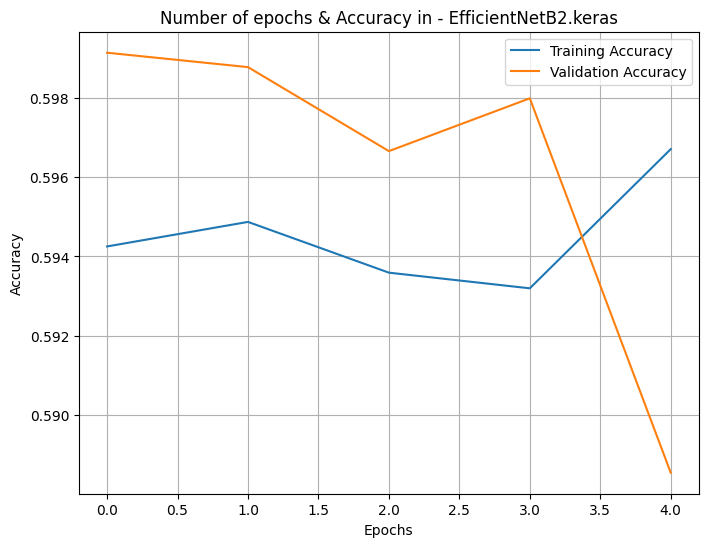

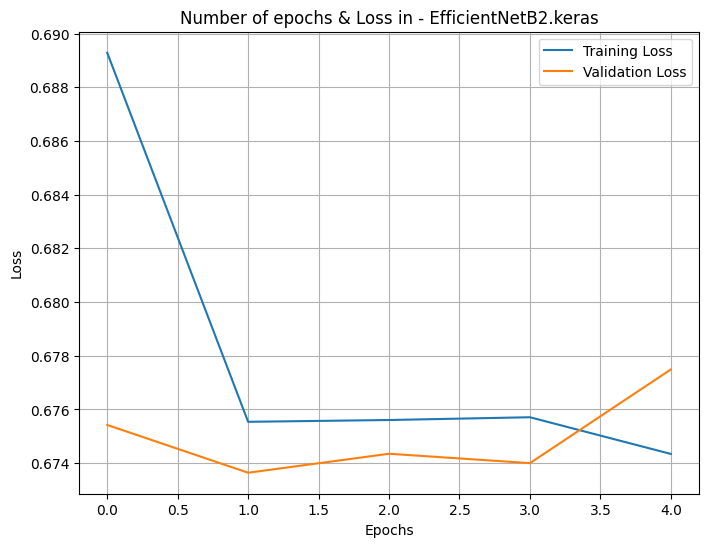

In [67]:
# Visualize Accuracy history
plot_accuracy("EfficientNetB2.keras")

# Visualize Loss history
plot_loss("EfficientNetB2.keras")

## - Result

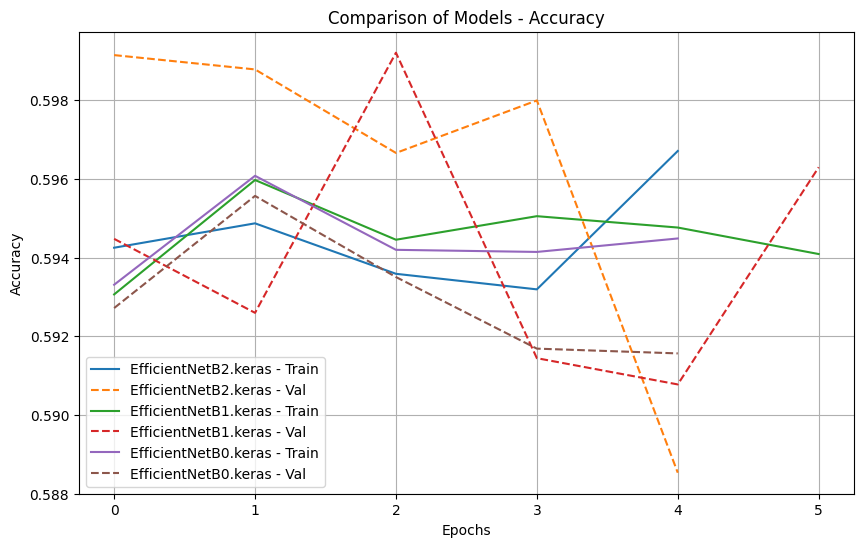

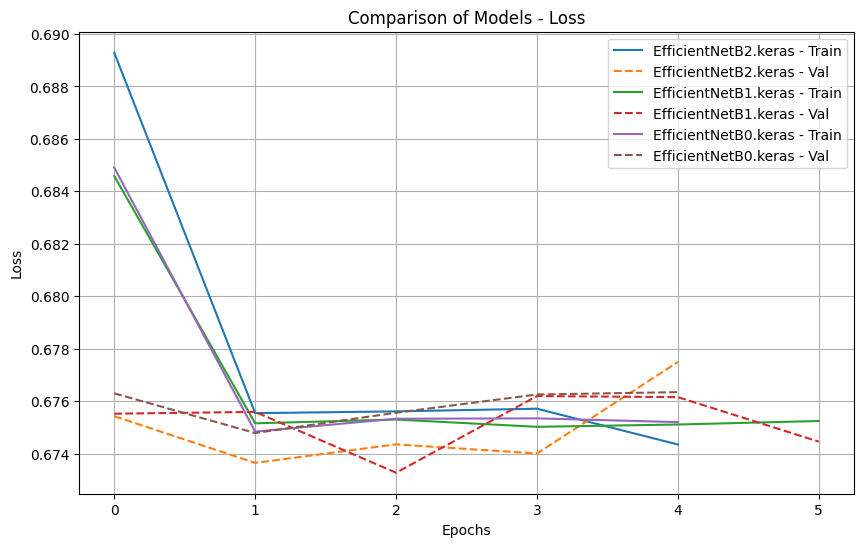

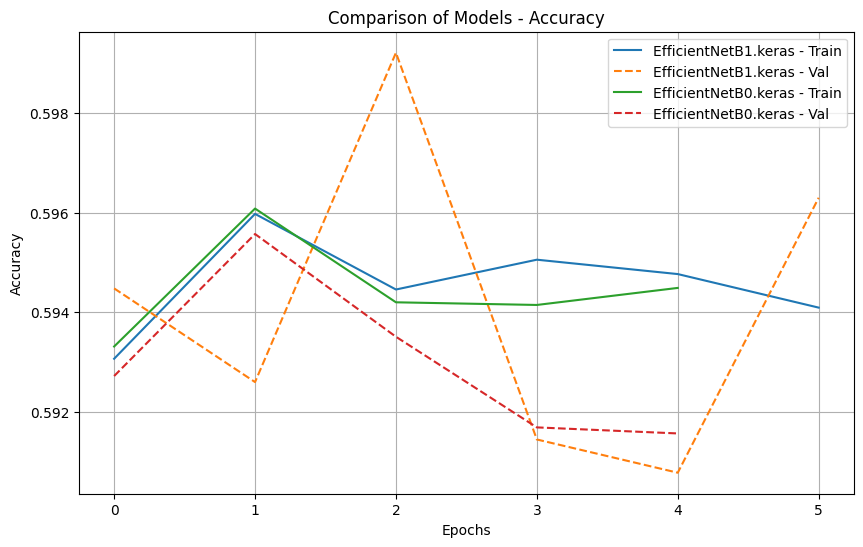

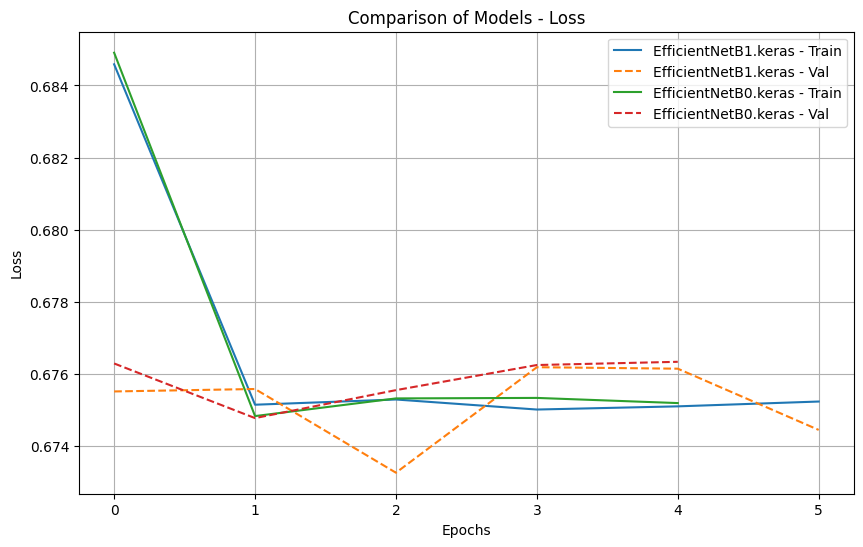

In [68]:
# Comparison of "EfficientNetB2", "EfficientNetB1", "EfficientNetB0" models [Accuracy & Loss]
compare_models_accuracy(["EfficientNetB2.keras", "EfficientNetB1.keras", "EfficientNetB0.keras"])
compare_models_loss(["EfficientNetB2.keras", "EfficientNetB1.keras", "EfficientNetB0.keras"])
compare_models_accuracy(["EfficientNetB1.keras", "EfficientNetB0.keras"])
compare_models_loss(["EfficientNetB1.keras", "EfficientNetB0.keras"])

# 8. Result

## - Comparing All Models Visually

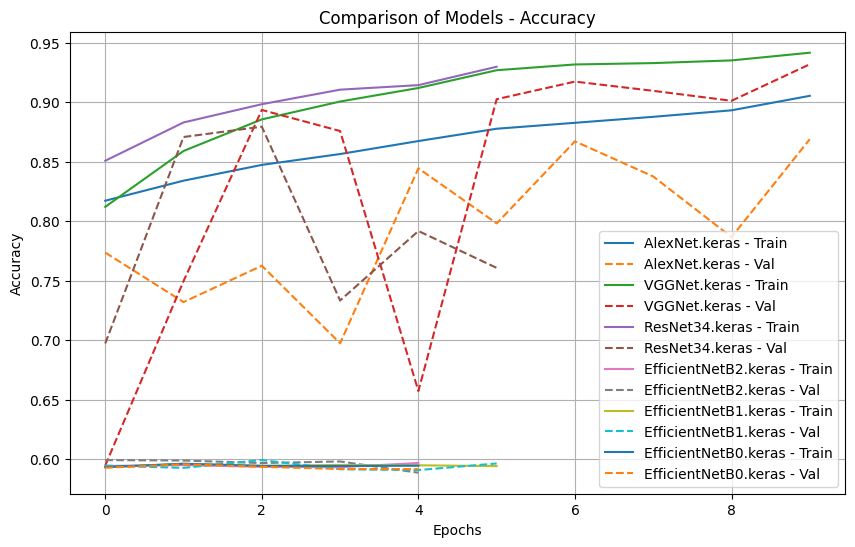

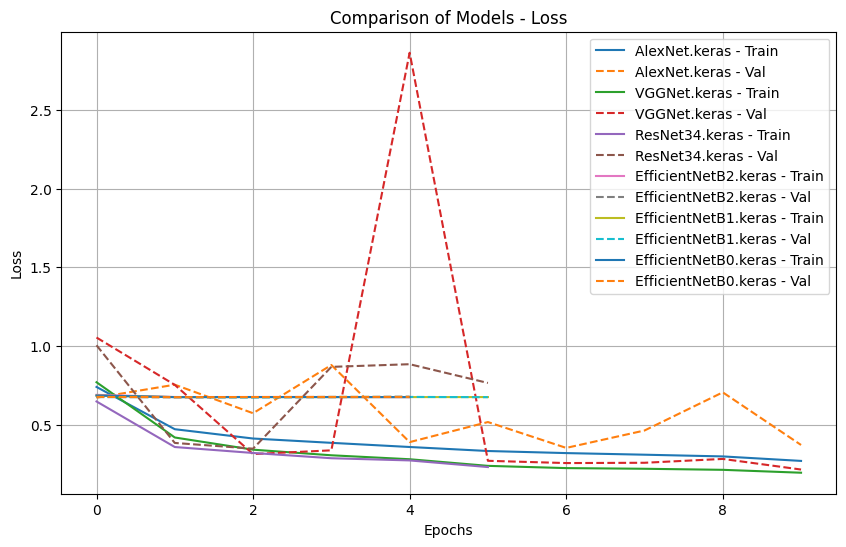

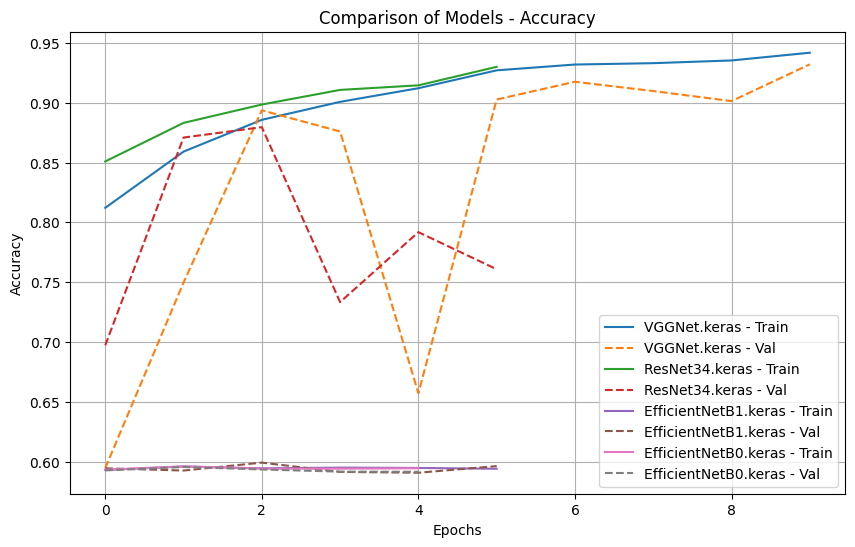

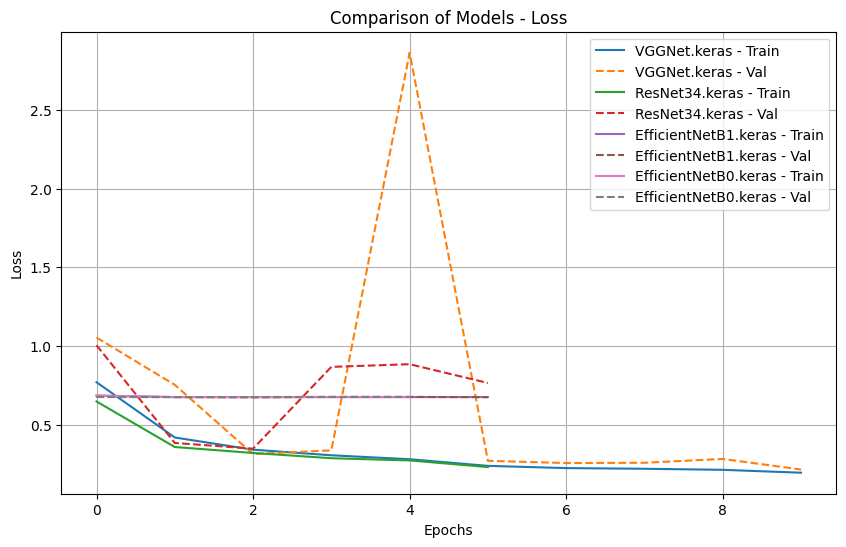

In [69]:
# Comparison of All models [Accuracy & Loss]
compare_models_accuracy(["AlexNet.keras", "VGGNet.keras", "ResNet34.keras","EfficientNetB2.keras", "EfficientNetB1.keras", "EfficientNetB0.keras"])
compare_models_loss(["AlexNet.keras", "VGGNet.keras", "ResNet34.keras","EfficientNetB2.keras", "EfficientNetB1.keras", "EfficientNetB0.keras"])
compare_models_accuracy(["VGGNet.keras", "ResNet34.keras","EfficientNetB1.keras", "EfficientNetB0.keras"])
compare_models_loss(["VGGNet.keras", "ResNet34.keras","EfficientNetB1.keras", "EfficientNetB0.keras"])

## - Prediction and Evaluation of Models

> ### ***Please:***
>
>   *Feel free to **share your thoughts in the *discussion*** section—let’s challenge this run together!*